数据加载完成 ...


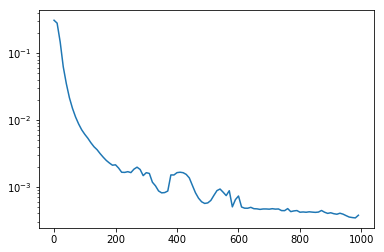

0 9999
count    8.782332e+07
mean     1.074121e+02
std      3.885448e+02
min      0.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      3.400000e+01
max      9.999000e+03
dtype: float64


In [14]:
# 格力电器 000651
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# in_dir = '/home/kayzhou/Project/Guba_spider/guba/data'
# in_name = '/home/kayzhou/Project/Guba_spider/guba/data/000651.txt'

# 
# _list_len = []
# for i, in_name in enumerate(os.listdir(in_dir)):
#     print(i)
#     if i > 10:
#         break
#     in_name = os.path.join(in_dir, in_name)
#     for j, line in enumerate(open(in_name)):
# #         print(line)
#         try:
#             _list_len.append(len(json.loads(line)['content']))
#         except:
# #             print('Q&A')
#             pass

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

_lens = [int(line.strip()) for line in open('data/content_len.txt') if int(line.strip()) < 10e3]
print('数据加载完成 ...')
x, cdf, pdf = get_cdf_pdf(_lens, 0, 1000, 10)
plt.plot(x, pdf)
plt.yscale('log')
plt.show()


_lens = pd.Series(_lens)
print(_lens.min(), _lens.max())
print(_lens.describe())
